# Importing the Libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [196]:
ds = pd.read_csv('mallcustomers.csv')

In [197]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Undersrtanding the data

In [198]:
ds.shape

(200, 5)

In [199]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [200]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [201]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

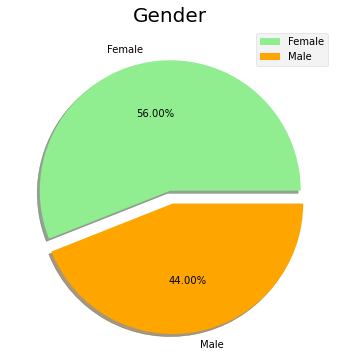

In [202]:
labels = ['Female', 'Male']
size = ds['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Female customers are more than male customers by 12%

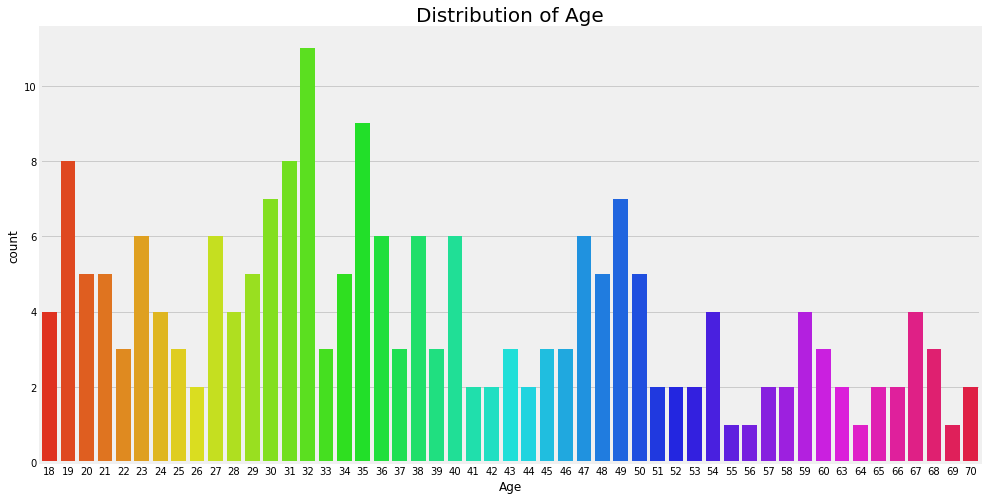

In [203]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(ds['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()


no.of customers count is below or equal to 6 except of people aged 32, 35, 31, 30, 19 and 49.

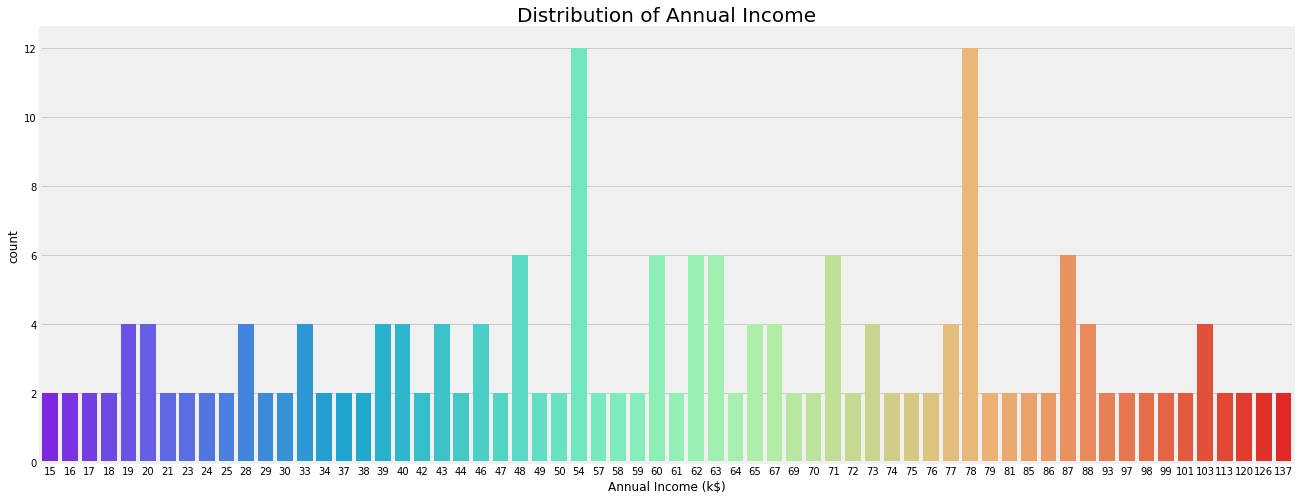

In [204]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(ds['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

 12 people earn a salary of 54K and 78K.
 
6 people earn a salary of 48K, 60K, 62K, 63K, 71K, 87K

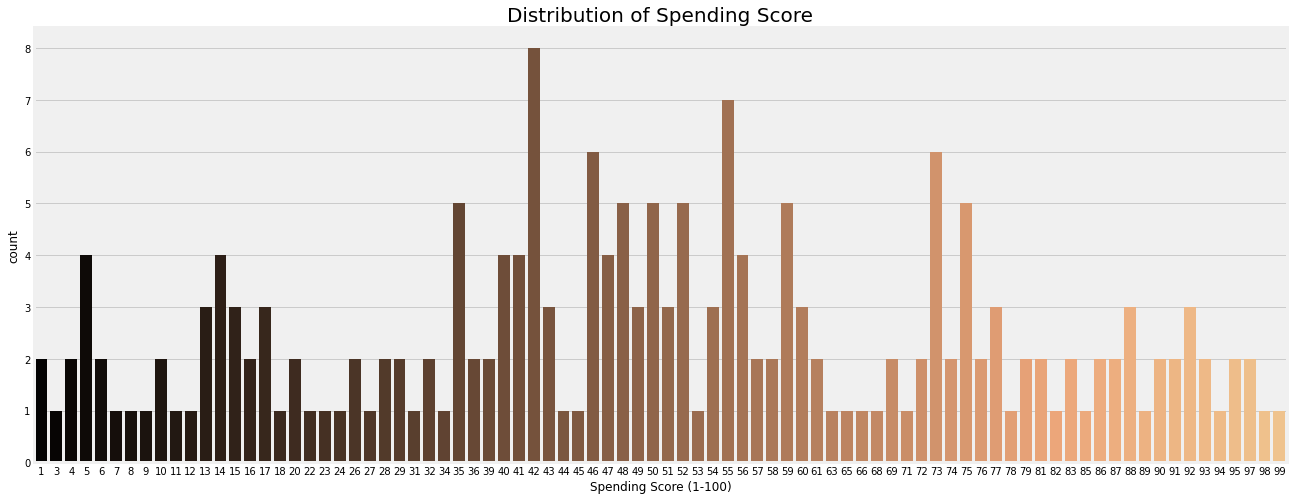

In [205]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(ds['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

 8 people has the highest spending score of 42 

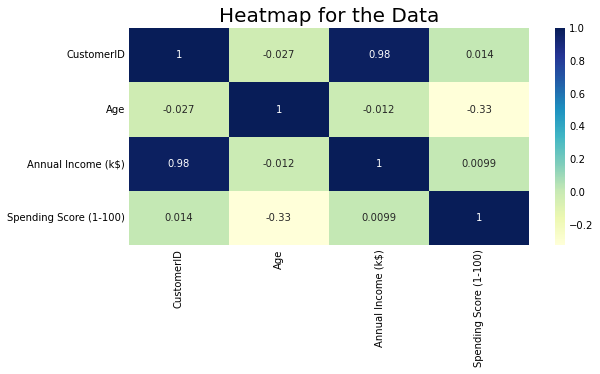

In [206]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.heatmap(ds.corr(), cmap = 'YlGnBu', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Customer ID and Annual Income has a greater corelation of 0.98.

Age and Customer ID has the least corelation of -0.027 

# Defining the input Attribute

In [207]:
X = ds.iloc[:, [3, 4]].values

In [208]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-Means  Clustering

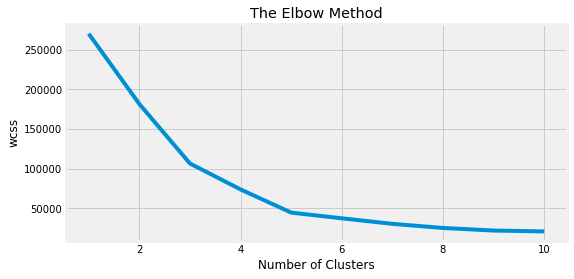

In [209]:
# Elbow Method to find the No. of Optimal Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

# Applying the K-Means to the dataset

In [210]:
kmeans=KMeans(n_clusters = 5, init='k-means++', max_iter = 300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)


# Predicting the centroid points


In [211]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


# Visualizing the five clusters

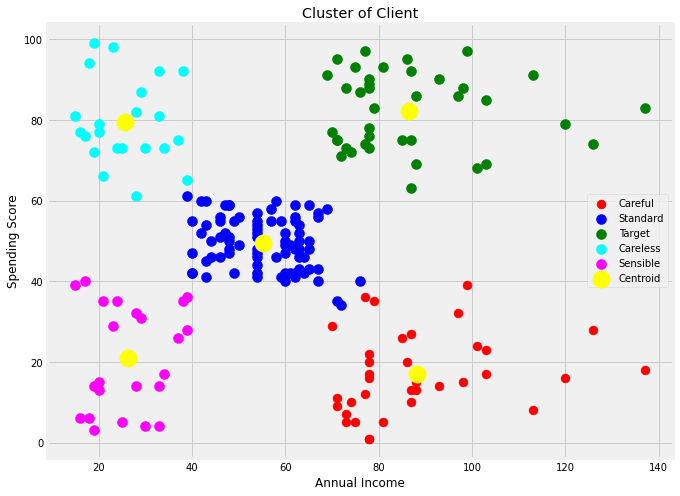

In [212]:
plt.figure(figsize = (10,8))
plt.scatter(X[y_kmeans== 0,0], X[y_kmeans == 0,1], s=80, c='red', label='Careful')
plt.scatter(X[y_kmeans== 1,0], X[y_kmeans == 1,1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans== 2,0], X[y_kmeans == 2,1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans== 3,0], X[y_kmeans == 3,1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans== 4,0], X[y_kmeans == 4,1], s=100, c='magenta', label='Sensible')

# Applying the centroids to all the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c= "yellow", label="Centroid")
plt.title("Cluster of Client")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Hierarchial Clustering

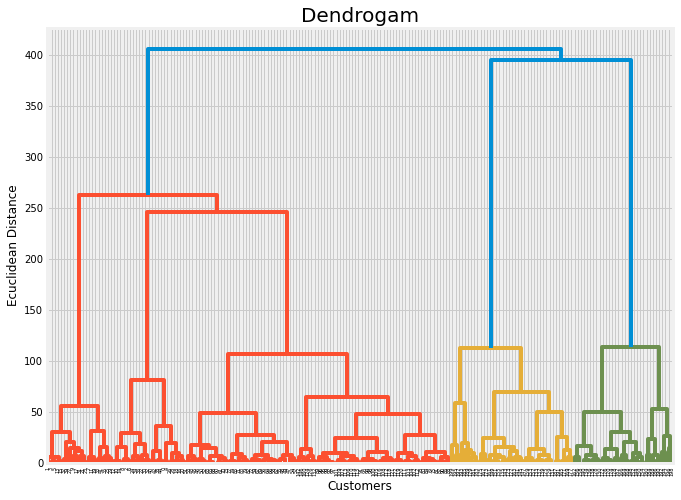

In [213]:
# Using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

# Silhouette Validation

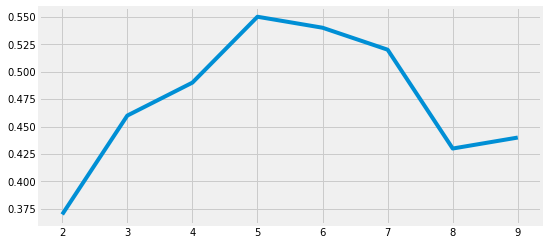

In [214]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,10):
    hc=AgglomerativeClustering(i)
    hc.fit(X)
    score.append(np.round(silhouette_score(X,hc.labels_),2))
plt.plot(range(2,10),score)
plt.show()

# Initialization Model

In [215]:
res = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = res.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Visualizing the Clusters of Hierarchial Clustering

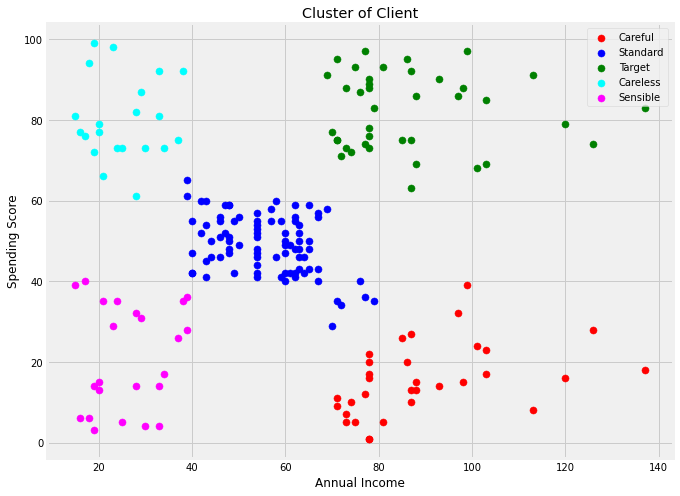

In [216]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc== 0,0], X[y_hc == 0,1], s=50, c='red', label='Careful')
plt.scatter(X[y_hc== 1,0], X[y_hc == 1,1], s=50, c='blue', label='Standard')
plt.scatter(X[y_hc== 2,0], X[y_hc == 2,1], s=50, c='green', label='Target')
plt.scatter(X[y_hc== 3,0], X[y_hc == 3,1], s=50, c='cyan', label='Careless')
plt.scatter(X[y_hc== 4,0], X[y_hc == 4,1], s=50, c='magenta', label='Sensible')
plt.title("Cluster of Client")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()